In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Prices from Feb 13, 2025 to March 13, 2025:
         Date  Predicted Price
0  2025-02-13     96726.956339
1  2025-02-14     94181.552492
2  2025-02-15     97442.898356
3  2025-02-16     94057.500538
4  2025-02-17     92981.716143
5  2025-02-18     95337.328887
6  2025-02-19     95364.980152
7  2025-02-20     95300.890771
8  2025-02-21     95366.432825
9  2025-02-22     96288.194276
10 2025-02-23     94969.955086
11 2025-02-24     96519.675429
12 2025-02-25     95588.569069
13 2025-02-26     93309.256300
14 2025-02-27     96165.069113
15 2025-02-28     92911.212682
16 2025-03-01     91875.573470
17 2025-03-02     96089.320907
18 2025-03-03     96146.388040
19 2025-03-04     96106.964351
20 2025-03-05     96181.638773
21 2025-03-06     97089.841535
22 2025-03-07     96017.976441
23 2025-03-08     97152.972121
24 2025-03-09     96378.747741
25 2025-03-10     94317.605867
26 2025-03-11     96849.174433
27 2025-03-12     93707.220642
28 2025-03-13     92693.004439


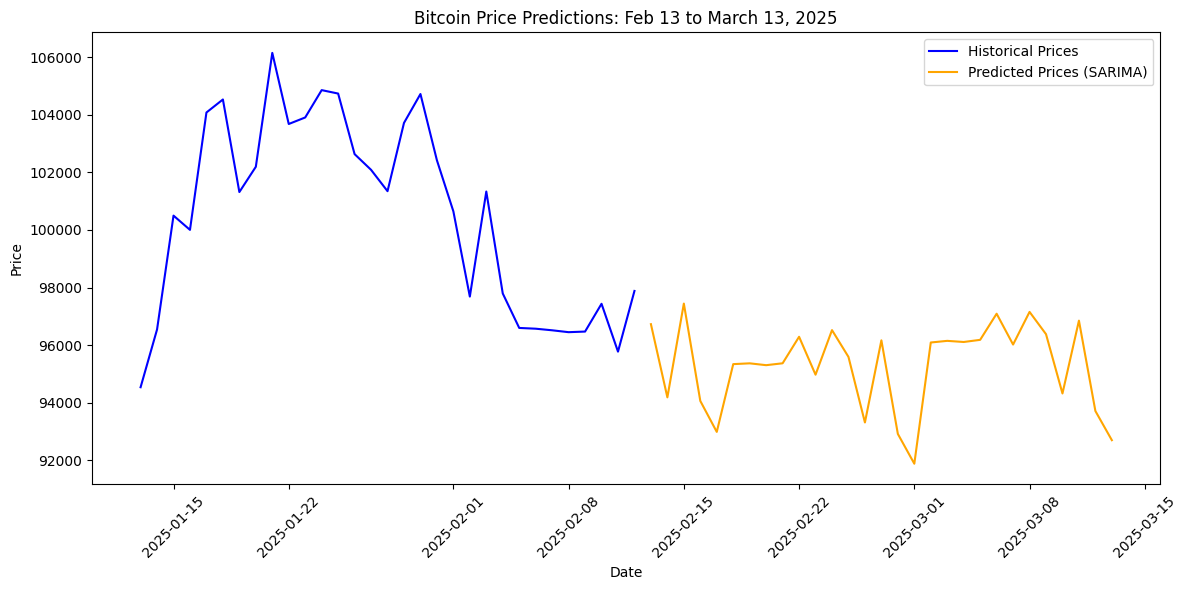

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading the dataset I downloaded on investing.com
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS 340W/Bitcoin Historical Data as on Feb 13.csv")

# Cleaning and preprocessing data
data.columns = ['date', 'price', 'open', 'high', 'low', 'volume', 'change']
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')  # Convert to datetime
data['price'] = data['price'].str.replace(',', '').astype(float)

# Sorting data by date in ascending order
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Using only the 'price' column for time-series forecasting
prices = data['price']

# Splitting dataset into training and future prediction periods sets.
train_data = prices[:'2025-02-12']  # Historical data up to January 28, 2025
future_dates = pd.date_range(start="2025-02-13", end="2025-03-13", freq='D')

# Fitting SARIMA model on training data
sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting future prices
forecast = sarima_fit.forecast(steps=len(future_dates))

# Creating a DataFrame for predicted prices with their corresponding dates
predicted_prices = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': forecast.values
})

# Printing predicted prices for each day
print("Predicted Prices from Feb 13, 2025 to March 13, 2025:")
print(predicted_prices)

# Visualization: Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(train_data.index[-100:], train_data[-100:], label='Historical Prices', color='blue')
plt.plot(future_dates, forecast, label='Predicted Prices (SARIMA)', color='orange')
plt.title('Bitcoin Price Predictions: Feb 13 to March 13, 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu


🚩 Trading Decision:
Position Style: Long
Entry Action: Buy Bitcoin on 2025-03-30 at $82371.60

📅 Daily Profit and Loss (P&L):
         Date  Predicted Price          P&L
0  2025-03-31     86656.107143  4284.507143
1  2025-04-01     83939.010850  1567.410850
2  2025-04-02     84035.605417  1664.005417
3  2025-04-03     83852.757153  1481.157153
4  2025-04-04     85987.149240  3615.549240
5  2025-04-05     87410.904240  5039.304240
6  2025-04-06     87277.785241  4906.185241
7  2025-04-07     88968.250042  6596.650042
8  2025-04-08     88994.847078  6623.247078
9  2025-04-09     86206.887427  3835.287427
10 2025-04-10     84484.466999  2112.866999
11 2025-04-11     84212.197056  1840.597056
12 2025-04-12     88322.100413  5950.500413
13 2025-04-13     85623.268394  3251.668394
14 2025-04-14     85560.924285  3189.324285
15 2025-04-15     85280.549272  2908.949272
16 2025-04-16     87554.620091  5183.020091
17 2025-04-17     88930.763379  6559.163379
18 2025-04-18     88873.711701  6502.

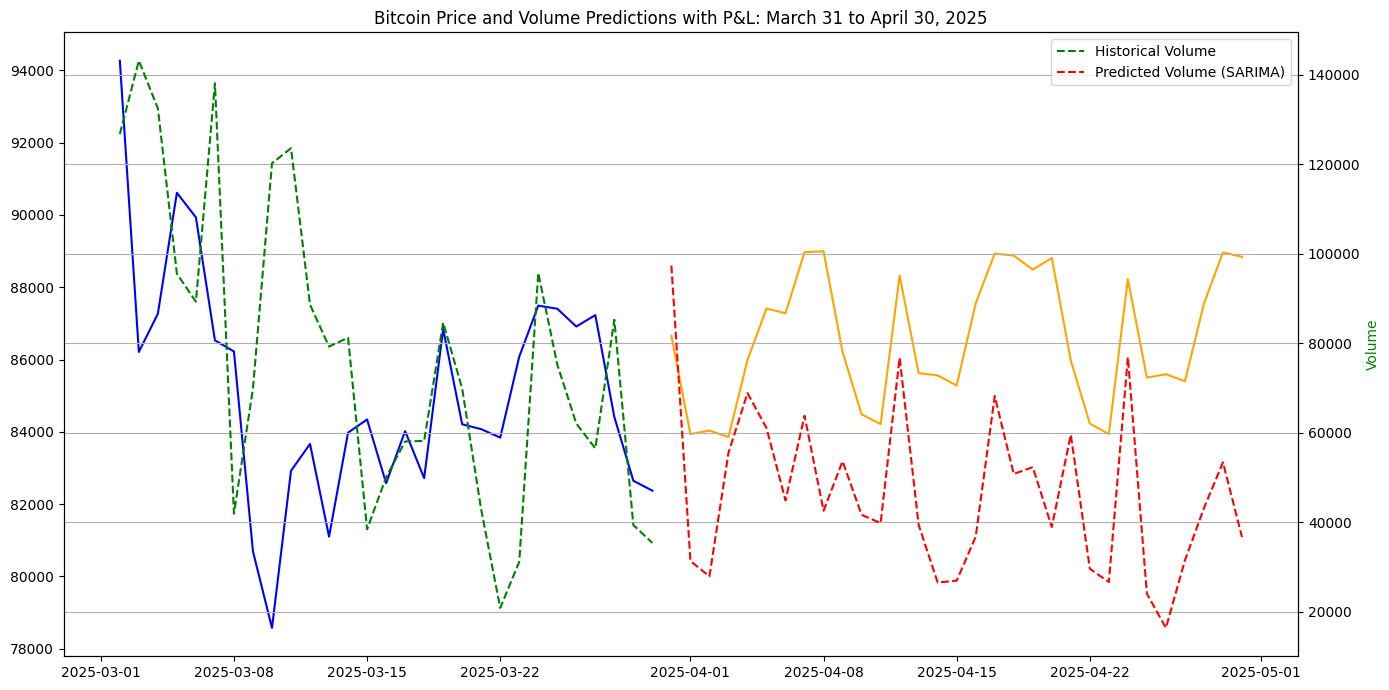


📅 Predicted Bitcoin Prices and Volumes from March 31 to April 30, 2025:
         Date  Predicted Price  Predicted Volume          P&L
0  2025-03-31     86656.107143      97356.328161  4284.507143
1  2025-04-01     83939.010850      31316.520734  1567.410850
2  2025-04-02     84035.605417      27891.785508  1664.005417
3  2025-04-03     83852.757153      55467.909622  1481.157153
4  2025-04-04     85987.149240      68863.525085  3615.549240
5  2025-04-05     87410.904240      61039.158307  5039.304240
6  2025-04-06     87277.785241      44866.947535  4906.185241
7  2025-04-07     88968.250042      63795.815997  6596.650042
8  2025-04-08     88994.847078      42560.832872  6623.247078
9  2025-04-09     86206.887427      53630.472807  3835.287427
10 2025-04-10     84484.466999      41648.859652  2112.866999
11 2025-04-11     84212.197056      39797.995496  1840.597056
12 2025-04-12     88322.100413      76759.031792  5950.500413
13 2025-04-13     85623.268394      39377.788474  3251.6683

In [4]:
#P&L On March 31

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS 340W/March 31 BTC.csv")

# Clean and preprocess data
data.columns = ['date', 'price', 'open', 'high', 'low', 'volume', 'change']
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['price'] = data['price'].str.replace(',', '').astype(float)
data['volume'] = data['volume'].str.replace('K', '').astype(float) * 1000

# Sort data by date
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Select price and volume columns
prices = data['price']
volumes = data['volume']

# Split dataset into training and future prediction periods
train_prices = prices[:'2025-03-30']
train_volumes = volumes[:'2025-03-30']
future_dates = pd.date_range(start="2025-03-31", end="2025-04-30", freq='D')

# Fit SARIMA models
sarima_price_model = SARIMAX(train_prices, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_price_fit = sarima_price_model.fit(disp=False)

sarima_volume_model = SARIMAX(train_volumes, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_volume_fit = sarima_volume_model.fit(disp=False)

# Forecast future prices and volumes
price_forecast = sarima_price_fit.forecast(steps=len(future_dates))
volume_forecast = sarima_volume_fit.forecast(steps=len(future_dates))

predicted_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': price_forecast.values,
    'Predicted Volume': volume_forecast.values
})

# Step 1: Identify Entry Point clearly
entry_price = train_prices[-7:].min()
entry_date = train_prices[-7:].idxmin().date()

# Step 2: Determine Position Style (Long or Short explicitly)
if volumes[-1] > volumes[-7:].mean():
    position_style = "Long"
    entry_action = f"Buy Bitcoin on {entry_date} at ${entry_price:.2f}"
else:
    position_style = "Short"
    entry_action = f"Borrow & Sell Bitcoin on {entry_date} at ${entry_price:.2f}"

print("\n🚩 Trading Decision:")
print(f"Position Style: {position_style}")
print(f"Entry Action: {entry_action}")

# Step 3: Calculate Profit and Loss (P&L) for each day based on Long or Short
if position_style == "Long":
    predicted_data['P&L'] = predicted_data['Predicted Price'] - entry_price
elif position_style == "Short":
    predicted_data['P&L'] = entry_price - predicted_data['Predicted Price']

# Display the P&L DataFrame
print("\n📅 Daily Profit and Loss (P&L):")
print(predicted_data[['Date', 'Predicted Price', 'P&L']])

# Visualization: Predicted Prices and Volumes clearly plotted with P&L
plt.figure(figsize=(14,7))

plt.plot(train_prices.index[-100:], train_prices[-100:], label='Historical Prices', color='blue')
plt.plot(future_dates, price_forecast, label='Predicted Prices (SARIMA)', color='orange')

ax2=plt.gca().twinx()
ax2.plot(train_volumes.index[-100:], train_volumes[-100:], label='Historical Volume', color='green', linestyle='dashed')
ax2.plot(future_dates, volume_forecast, label='Predicted Volume (SARIMA)', color='red', linestyle='dashed')

plt.title('Bitcoin Price and Volume Predictions with P&L: March 31 to April 30, 2025')
plt.xlabel('Date')
plt.ylabel('Price (USD)', color='blue')
ax2.set_ylabel('Volume', color='green')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print predicted prices and volumes for one month clearly:
print("\n📅 Predicted Bitcoin Prices and Volumes from March 31 to April 30, 2025:")
print(predicted_data)